In [20]:
from random import randint

def get_coords(k):
    coords = [(randint(1,k),randint(1,k)) for i in range(1,k)]
    return list(set(coords))


# coords_list = get_coords(10)

In [26]:
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math

# Create list of city coordinates
# coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3),(5,6),(4,8)]
# Set random seed
np.random.seed(2)

# coords_list = get_coords(50)
# fitness_coords = mlrose.TravellingSales(coords = coords_list)

# edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
edges = get_coords(50)
fitness = mlrose.MaxKColor(edges)
problem_fit = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val=2)

def get_data(algorithm, run_times, **args):
    state = []
    fit = []
    dur = []
    for n in range(run_times):
        start_time = datetime.now()

        _state, _fit = algorithm(problem_fit, **args)
        time_diff = datetime.now() - start_time
        _dur = time_diff.microseconds/1000

        state.append(_state)
        fit.append(_fit)
        dur.append(_dur)
    return np.mean(fit),np.mean(dur)

def by_max_iters(algorithm, run_times, max_iters, **args):
    fit = []
    dur = []
    for i in max_iters:
        _fit, _dur = get_data(algorithm, run_times, max_iters=i, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur


max_iters=[100,1000,10000,15000,20000]
run_times=2


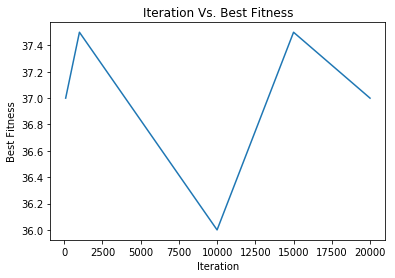

In [27]:
fit_ga, dur_ga = by_max_iters(mlrose.genetic_alg, run_times, max_iters, pop_size=200, mutation_prob=0.1)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

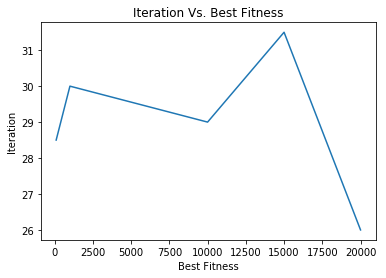

In [28]:
fit_rhc, dur_rhc = by_max_iters(mlrose.random_hill_climb, run_times, max_iters)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_rhc)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

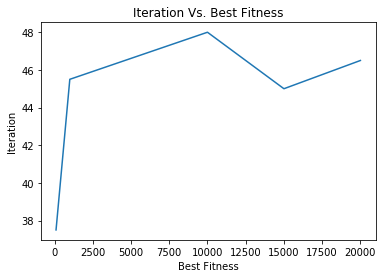

In [29]:
fit_sa, dur_sa = by_max_iters(mlrose.simulated_annealing, run_times, max_iters)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_sa)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

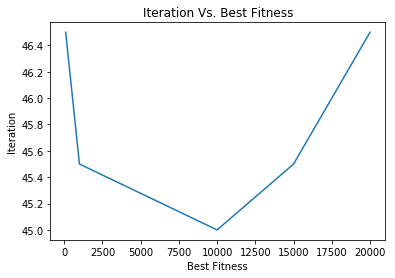

In [30]:
fit_mi, dur_mi = by_max_iters(mlrose.mimic, run_times, max_iters)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_mi)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

In [31]:
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_rhc,fit_sa,fit_mi]),columns=['ga','rhc','sa','mimic'],index=max_iters)
duration_df = pd.DataFrame(np.column_stack([dur_ga,fit_rhc,dur_sa,dur_mi]),columns=['ga','rhc','sa','mimic'],index=max_iters)
print(fitness_df)



         ga   rhc    sa  mimic
100    37.0  28.5  37.5   46.5
1000   37.5  30.0  45.5   45.5
10000  36.0  29.0  48.0   45.0
15000  37.5  31.5  45.0   45.5
20000  37.0  26.0  46.5   46.5


Text(0, 0.5, 'Best Fitness')

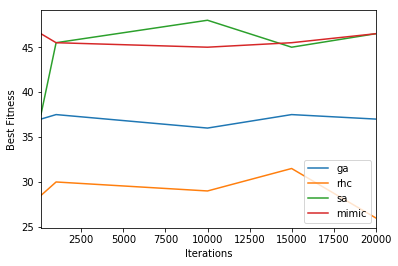

In [32]:
fig, ax = plt.subplots()
fitness_df.plot(ax=ax)
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")
